## Ссылки:
распределения Рэлея: https://ru.wikipedia.org/wiki/%D0%A0%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5_%D0%A0%D1%8D%D0%BB%D0%B5%D1%8F
та же статья на википедии, но на английском, некоторые формулы отличаются:
https://en.wikipedia.org/wiki/Rayleigh_distribution#Parameter_estimation

## Part 1

In [12]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import math
%matplotlib inline

In [5]:
# распределения Рэлея
reyleighDist = scipy.stats.rayleigh(scale = 1)
# выборка 1000 элементов из распределения
sample = reyleighDist.rvs(1000)

/Users/sergey.zhurbey/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


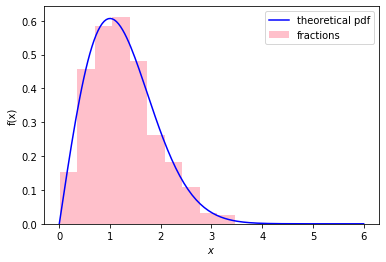

In [6]:
x = numpy.linspace(0, 6, 150)
# теоретическое распределение Рэлея
pdf = reyleighDist.pdf(x)
# построение графика теоретического распределения
plt.plot(x, pdf, label='theoretical pdf', color='blue')

# построение гистограммы выборки
plt.hist(sample, normed = True, color='pink', label='fractions')
plt.ylabel('f(x)')
plt.xlabel('$x$')

plt.legend()


## Part 2

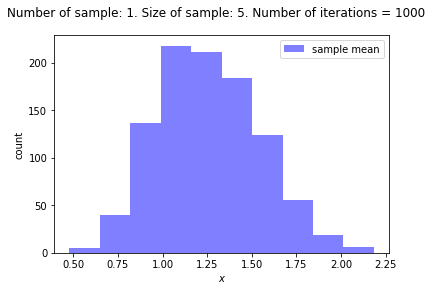

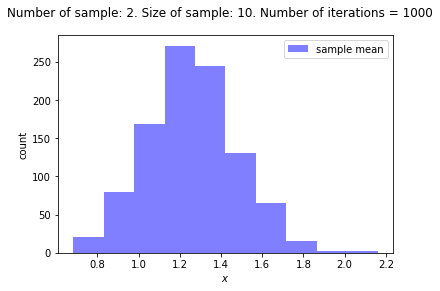

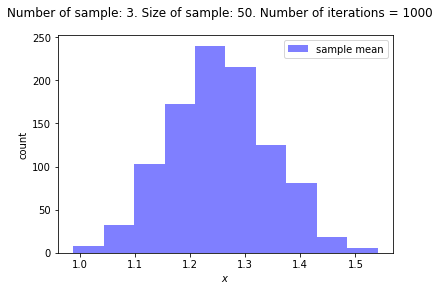

In [7]:
# Выборки с различными значениями n
# Глобальная переменная для сохранения результатов для расчетов из 3 части
samplesGlobal = []
for idx, n in enumerate((5, 10, 50)):
    sample = []
    for i in range(1, 1001, 1):
        sample.append(sum(reyleighDist.rvs(n)) / n)
    
    samplesGlobal.append(sample)
    plt.figure()
    plt.suptitle('Number of sample: {}. Size of sample: {}. Number of iterations = 1000'.format(idx + 1, n))
    plt.hist(sample, label='sample mean', alpha=0.5, color='blue')
    plt.ylabel('count')
    plt.xlabel('$x$')
    plt.legend()    

In [8]:
# Расчет всех параметров приближающих распределение выборочных средних
# sigma = 1 (Объявлено при инициализации распределения Рэлея) 
sigma = 1.
# математическое ожидание
mean = sigma * math.sqrt(math.pi / 2)

# дисперсия
variance = ((4. - math.pi) / 2) * (sigma ** 2)
# мода
mode = sigma
# медиана
median = sigma * math.sqrt(2 * math.log(2, math.e))

print('mean: {}'.format(mean))
print('variance: {}'.format(variance))
print('mode: {}'.format(mode))
print('median: {}'.format(median))

mean: 1.2533141373155001
variance: 0.42920367320510344
mode: 1.0
median: 1.1774100225154747


## Part 3

### Central limit theorem
Наложение графиков апроксимации центральной предельной теормы

/Users/sergey.zhurbey/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


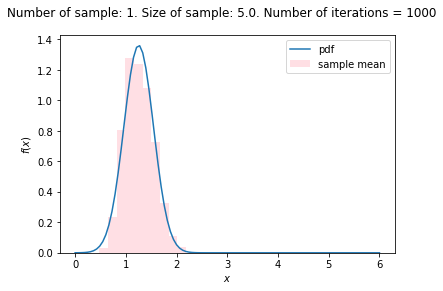

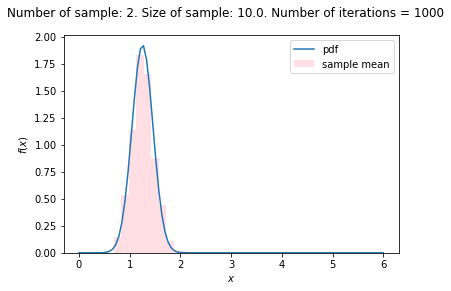

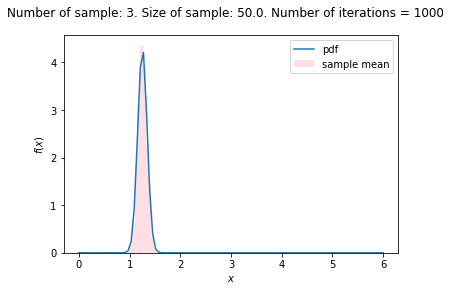

In [20]:
for idx, value in enumerate(samplesGlobal):
    sampleSize = 5. * (idx + 1)
    if idx == 2:
        sampleSize = 50.
        
    plt.figure()
    plt.suptitle('Number of sample: {}. Size of sample: {}. Number of iterations = 1000'.format(idx + 1, sampleSize))
    plt.hist(value, label='sample mean', alpha=0.5, color='pink', normed = True)
    plt.ylabel('probability')
    plt.xlabel('$x$')
    
    norm_rv = sts.norm(mean, math.sqrt(variance / sampleSize))
    x = x = np.linspace(0, 6, 100)
    pdf = norm_rv.pdf(x)
    plt.plot(x, pdf, label='pdf')
    plt.legend()
    plt.ylabel('$f(x)$')
    plt.xlabel('$x$')

    plt.legend()

## Вывод

Из полученных графиков апроксимации выборки центральной предельной теоремой видно, что при увеличении размера выборки увеличивается точность апроксимации. Так как распределение Рэлея не сильно перекошено и достаточно схоже с нормальным, апроксимация достаточно точна при небольших размерах выборки. При увеличении выборки до 50 видно, что апроксимация становится невероятно точной. Результаты работы совпадают с ожидаемыми результатами центральной предельной теоремы.